# 신경망학습
## 107p~

  * 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻함
  * 손실함수 : 신경망이 학습할 수 있도록 해주는 지표
  * 학습 목표 : 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것
## 데이터 주도 학습
  * 인간은 직관을 활용해 가설을 검증 (시행착오) / 기계학습은 인간을 배제하고  수집된 데이터로 부터 패턴 찾아나감
  * 종단간 기계학습(end-to-end mashine learning) : 처음부터 끝까지, 데이터 입력에서 결과까지 사람의 개입없이 이루어짐
## 훈련 데이터와 테스트 데이터
  * 분리 이유: 범용성을 평가하기 위함
  * 오버피팅 : 제한된 데이터셋에만 지나치게 최적화된 상태 (편향된 상태)
## 손실함수
  * 평균제곱오차(MSE:mean squared error), 크로스엔트로피 오차를 주로 사용
  * 매개변수의 미분이 대부분의 장소에서 0이 되기 때문에 신경망 학습시 정확도accuracy를 지표로 삼아선 안된다. 

#  1. 평균제곱오차(MSE:mean squared error)

In [1]:
import numpy as np
#MSE
def MSE(y,t):
    return 0.5 * np.sum((y-t)**2)

y = [.1, .05, .6, 0, .05, .1, 0, .1, 0, 0] # 예측한 값 '2'가 60%로 가장 확률이 높음 (예시 :mnist data set 에서 softmax 함수 출력값)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 실제 값 '2' (원 핫 인코딩 한 값)

#MSE값 출력
MSE(np.array(y), np.array(t))

0.09750000000000003

In [2]:
#예측값이 '7'이 60%로 가장 높았을 때, MSE 구하기
y1 = [.1, .05, .1, 0, .05, .1, 0, .6, 0, 0] # 예측한 값 '7'가 60%로 가장 확률이 높음 (예시 :mnist data set 에서 softmax 함수 출력값)

MSE(np.array(y1), np.array(t))

0.5975

 * 1) 'y'일때, MSE=0.0975
 * 2) 'y1'일때, MSE=0.5975
 * '1'번의 경우가, MSE가 더 낮아, 그만큼 오차가 적고, 정답에 더 가깝다고 판단

#  2. 교차 엔트로피 오차(CEE: cross entropy error)

In [3]:
def CEE(y,t):
    delta = 1e-7
    return - np.sum(t*np.log(y+delta))

y = [.1, .05, .6, 0, .05, .1, 0, .1, 0, 0] # 예측한 값 '2'가 60%로 가장 확률이 높음 (예시 :mnist data set 에서 softmax 함수 출력값)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 실제 값 '2' (원 핫 인코딩 한 값)

CEE(np.array(y), np.array(t))

0.510825457099338

In [4]:
#예측값이 '7'이 60%로 가장 높았을 때, MSE 구하기
y1 = [.1, .05, .1, 0, .05, .1, 0, .6, 0, 0] # 예측한 값 '7'가 60%로 가장 확률이 높음 (예시 :mnist data set 에서 softmax 함수 출력값)

CEE(np.array(y1), np.array(t))

2.302584092994546

# 미니배치 학습
 * 미니배치 학습 : 전체 훈련 데이터 중 일부만 무작위 추출하여 학습
 * 이유 : 모든 데이터의 손실함수를 구한다면 계산량이 많다. 일부 샘플링하여 '근사치'로 구함

In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
#random choice 활용, train data에서 무작위로 10개 추출하기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
# batch CEE (원핫 인코딩 한 경우,)
def CEE_b_o(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

In [8]:
# batch CEE (정답 레이블이 실제 숫자로 주어질 경우,)
def CEE_b_r(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size

# 수치 미분
 * 수치미분과 진정한 미분 사이의 차이를 극복하기 위해 중심차분(중앙차분)을 계산한다.

In [9]:
#수치미분
def numerical_diff(f,x):
    h = 1e-4 #0.0001을 의미 (미분시 lim h->0 의 개략적 표현)
    return (f(x+h) - f(x-h)) / (2*h)

In [10]:
#수치미분 예시
def function_1(x):
    return 0.01*x**2 + 0.1*x

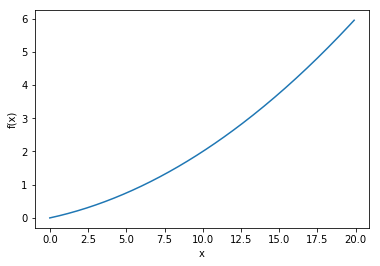

In [12]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0-20까지 0.1간격의 배열 x
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [13]:
print(numerical_diff(function_1, 5)) #실제 미분값은 0.2
print(numerical_diff(function_1, 10)) #실제 미분값은 0.3

0.1999999999990898
0.2999999999986347


In [14]:
# 편미분
def function_2(x):     #f(x0, x1) = x0^2 + x1^2
    return x[0]**2 + x[1]**2 #또는 return np.sum(x**2)

In [15]:
# 예제 x0 = 3, x1=4 일때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0*x0 +4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [16]:
# 예제 x0 = 3, x1=4 일때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3**2 +x1**x1
numerical_diff(function_tmp1, 4.0)

7.999999999999119

In [17]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #x와 형상이 같고 원소가 모두 0인 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h #f(x+h)계산
        fxh1 = f(x)
        
        x[idx] = tmp_val - h #f(x-h)계산
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값을 복원
    
    return grad

In [18]:
#예시 (3,4),(0,2),(3,0) 에서 기울기 구하기

print(numerical_gradient(function_2, np.array([3.0,4.0])))
print(numerical_gradient(function_2, np.array([0.0,2.0])))
print(numerical_gradient(function_2, np.array([3.0,0.0])))
#

[6. 8.]
[0. 4.]
[6. 0.]


In [19]:
# 변수가 많은 2차 방정식을 numpy 행렬로 각각의 변수로 편미분

def function_3(x):     #f(x0, x1, x2,...) = x0^2 + x1^2 + x2^3 + ....
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #x와 형상이 같고 원소가 모두 0인 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h #f(x+h)계산
        fxh1 = f(x)
        
        x[idx] = tmp_val - h #f(x-h)계산
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값을 복원
    
    return grad


print(numerical_gradient(function_2, np.array([3.0,4.0,5.0,0.0,2.0])))
print(numerical_gradient(function_2, np.array([0.0,2.0,1.0,4.0,5.0])))
print(numerical_gradient(function_2, np.array([3.0,0.0,1.0,5.0,0.0])))

[6. 8. 0. 0. 0.]
[0. 4. 0. 0. 0.]
[6. 0. 0. 0. 0.]


# 경사하강법
 * 극소값 : 기울기0, 한정된 범위 내 최소값
 * 극대값 : 기울기0, 한정된 범위 내 최대값
 * 안장점 : 기울기0, 극소값 혹은 극대값 (보는 위치에 극대, 극소로 봄)
 * 플래토plateau, 고원 : 복잡하고 찌그러진 함수의 일부 평평한 부분 (학습 정체 유발)
 * 에타, 학습률 learning rate : 한번 학습으로 얼만큼 학습할지 (매개변수 값을 얼마나 갱신할지 결정)
 * 학습률의 적정치 : 학습률을 적정 수준으로 지정하는 것이 중요

In [20]:
#경사하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):  #f:최적화하려는 함수 / init_x:초기값, lr:학습률, step_num:경사법에 따른 반봅 횟수
    x = init_x
    
    for i in range(step_num):    #설정한 반복 횟수 만큼 반복
        grad = numerical_gradient(f, x)    #앞서 정의한 기울기 함수로 기울기를 구한다.
        x -=lr * grad     # 구한 기울기에 학습률을 곱한후, x값을 갱신한다.  
    return x   #설정한 반복 횟수만큼 x 값을 갱신하고, 최종 x 값을 출력한다.

In [21]:
#경사법으로 f(x0, x1) = x0^2 + x1^2의 최소값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

In [24]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])